# <center> Predicting Employees under Stress for Pre-emptive Remediation </center>

In [1]:
import numpy as n  #numpy is a library to perform a wide variety of mathematical operations on arrays.
import pandas as p # Pandas is used to analyze data. 
import matplotlib.pyplot as m # For creating static, animated, and interactive visualizations in Python
import seaborn as s # a high-level interface for drawing attractive and informative statistical graphics
%matplotlib inline   
#used to save the plot in the notebook document below its code
p.options.mode.chained_assignment = None  # default='warn'

Importing useful metrics and tools from <b>scikit</b> library

In [2]:
from sklearn.model_selection import GridSearchCV
#it loops through the predefined hyperparameters and fit it in the model so that user can selct the best parameters.
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score, log_loss

In [3]:
s.set_style("darkgrid")
#m.rcParams to change runtime configuration of graph 
m.rcParams['font.size'] = 14 
m.rcParams['figure.figsize'] = (9, 5)
m.rcParams['figure.facecolor'] = '#00000000'

In [4]:
train_raw = p.read_csv('Train.csv', delimiter = ';') #reading the training set of data
train_raw

,EmployeeID,Target,Age,AvgDailyHours,Department,Education,EducationField,Gender,HasFlexibleTimings,IsIndividualContributor,...,RelationshipSatisfaction,RemoteWorkSatistfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLoadLevel,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,100001,0,36.0,6.45,Sales,5,Technical Degree,Male,No,Yes,...,1,Medium,3,8.0,2,2,Low,8.0,1.0,8.0
1,100002,0,24.0,8.48,Sales,5,Technical Degree,Male,No,Yes,...,1,Very High,2,1.0,5,2,High,0.0,0.0,0.0
2,100003,0,45.0,6.93,Research & Development,2,Technical Degree,Female,No,Yes,...,4,High,1,17.0,6,4,Low,17.0,4.0,10.0
3,100004,1,29.0,7.10,Sales,4,Medical,Male,No,No,...,4,Medium,2,2.0,0,2,NaN,1.0,1.0,1.0
4,100005,0,30.0,7.30,Human Resources,3,Life Sciences,Female,No,Yes,...,1,Very High,4,9.0,6,1,Medium,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,115996,0,19.0,6.81,Sales,2,Other,Male,Yes,Yes,...,3,High,2,0.0,3,1,NaN,0.0,0.0,0.0
15996,115997,0,56.0,7.60,Sales,2,Technical Degree,Female,No,No,...,2,Low,2,7.0,2,1,Medium,6.0,2.0,2.0
15997,115998,0,26.0,6.52,Human Resources,1,Other,Female,No,Yes,...,3,High,4,5.0,3,4,High,1.0,1.0,1.0
15998,115999,0,29.0,6.11,Research & Development,4,Human Resources,Female,Yes,No,...,1,High,2,6.0,3,1,High,1.0,1.0,1.0


In [5]:
train_raw[(train_raw.PerformanceRating == 4)].JobSatisfaction.value_counts() 
#value_counts() function returns object containing counts of unique values.

4    1009
1    1006
2     984
3     961
Name: JobSatisfaction, dtype: int64

In [6]:
train_raw.columns #reading the column names

Index(['EmployeeID', 'Target', 'Age', 'AvgDailyHours', 'Department',
       'Education', 'EducationField', 'Gender', 'HasFlexibleTimings',
       'IsIndividualContributor', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'LeavesTaken', 'MaritalStatus', 'MicromanagedAtWork',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'RemoteWorkSatistfaction', 'SelfMotivationLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'WorkLoadLevel',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

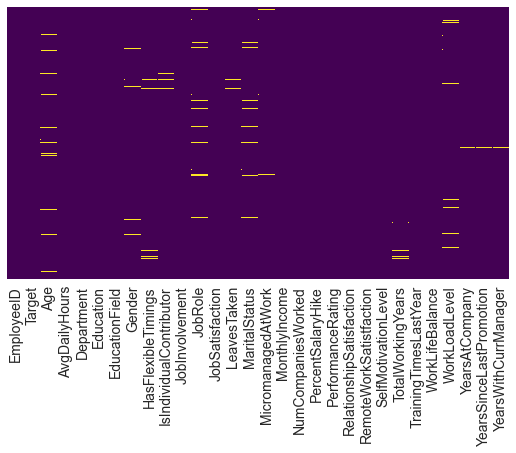

In [7]:
ax = s.heatmap(train_raw.isnull(),yticklabels = False,cbar=False,cmap='viridis') 
#used to represent the analysis in various shades of the same colour for each value to be plotted.

In [8]:
train_raw.isnull().sum() # the count of null values in a column (dowm the column)

EmployeeID                    0
Target                        0
Age                         607
AvgDailyHours                 0
Department                    0
Education                     0
EducationField                0
Gender                      348
HasFlexibleTimings          169
IsIndividualContributor     325
JobInvolvement                0
JobRole                     370
JobSatisfaction               0
LeavesTaken                  49
MaritalStatus               234
MicromanagedAtWork          138
MonthlyIncome                 0
NumCompaniesWorked            0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
RemoteWorkSatistfaction       0
SelfMotivationLevel           0
TotalWorkingYears           333
TrainingTimesLastYear         0
WorkLifeBalance               0
WorkLoadLevel               413
YearsAtCompany              333
YearsSinceLastPromotion     333
YearsWithCurrManager        333
dtype: int64

In [9]:
train_raw.describe() #statistical description of dataframe excluding null values

,EmployeeID,Target,Age,AvgDailyHours,Education,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,16000.000000,16000.000000,15393.000000,16000.000000,16000.000000,16000.000000,16000.000000,15951.000000,15862.000000,1.600000e+04,...,16000.000000,16000.000000,16000.000000,16000.000000,15667.000000,16000.000000,16000.000000,15667.000000,15667.000000,15667.000000
mean,108000.500000,0.176250,38.966413,7.768878,3.001313,2.509063,2.494937,10.914175,3.001954,2.280443e+05,...,16.003000,2.493875,2.494687,2.488000,9.205464,3.004313,2.499125,4.557669,1.785792,2.017872
std,4618.946489,0.381045,12.365318,1.827135,1.410916,1.122329,1.116211,6.449444,1.413566,6.733454e+05,...,5.488681,1.116934,1.118559,1.118228,8.885191,2.003352,1.113026,5.864989,1.695834,2.441463
min,100001.000000,0.000000,18.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.017000e+03,...,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,104000.750000,0.000000,28.000000,6.660000,2.000000,2.000000,1.000000,6.000000,2.000000,3.333300e+04,...,11.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,108000.500000,0.000000,39.000000,7.400000,3.000000,3.000000,2.000000,9.000000,3.000000,1.250000e+05,...,16.000000,2.000000,2.000000,2.000000,6.000000,3.000000,2.000000,2.000000,1.000000,1.000000
75%,112000.250000,0.000000,50.000000,8.490000,4.000000,4.000000,3.000000,15.000000,4.000000,2.416670e+05,...,21.000000,3.000000,3.000000,3.000000,15.000000,5.000000,3.000000,7.000000,3.000000,3.000000
max,116000.000000,1.000000,60.000000,18.340000,5.000000,4.000000,4.000000,30.000000,5.000000,7.916670e+06,...,25.000000,4.000000,4.000000,4.000000,39.000000,6.000000,4.000000,38.000000,5.000000,10.000000


In [10]:
train_raw.info() # Summary of DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                16000 non-null  int64  
 1   Target                    16000 non-null  int64  
 2   Age                       15393 non-null  float64
 3   AvgDailyHours             16000 non-null  float64
 4   Department                16000 non-null  object 
 5   Education                 16000 non-null  int64  
 6   EducationField            16000 non-null  object 
 7   Gender                    15652 non-null  object 
 8   HasFlexibleTimings        15831 non-null  object 
 9   IsIndividualContributor   15675 non-null  object 
 10  JobInvolvement            16000 non-null  int64  
 11  JobRole                   15630 non-null  object 
 12  JobSatisfaction           16000 non-null  int64  
 13  LeavesTaken               15951 non-null  float64
 14  Marita

In [11]:
df = train_raw.dropna() #Drop/remove the null.missing values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13554 entries, 0 to 15999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13554 non-null  int64  
 1   Target                    13554 non-null  int64  
 2   Age                       13554 non-null  float64
 3   AvgDailyHours             13554 non-null  float64
 4   Department                13554 non-null  object 
 5   Education                 13554 non-null  int64  
 6   EducationField            13554 non-null  object 
 7   Gender                    13554 non-null  object 
 8   HasFlexibleTimings        13554 non-null  object 
 9   IsIndividualContributor   13554 non-null  object 
 10  JobInvolvement            13554 non-null  int64  
 11  JobRole                   13554 non-null  object 
 12  JobSatisfaction           13554 non-null  int64  
 13  LeavesTaken               13554 non-null  float64
 14  Marita

## Visualizing data for a better insight 

<AxesSubplot:title={'center':'Number of Employees under Stress'}, xlabel='Target', ylabel='count'>

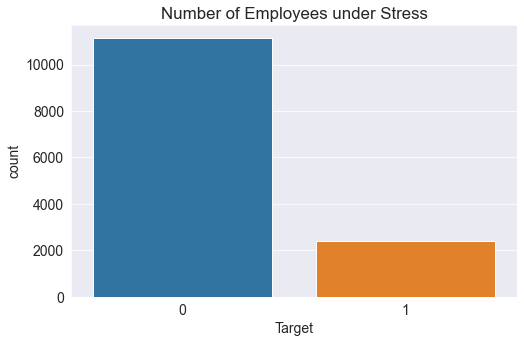

In [13]:
m.figure(figsize=(8,5))
#above line would change plot size
m.title('Number of Employees under Stress')
s.countplot(x = df.Target)
#plot which can be thought of as a histogram across a categorical, instead of quantitative, variable.

<AxesSubplot:title={'center':'Age vs Education'}, xlabel='Education', ylabel='Age'>

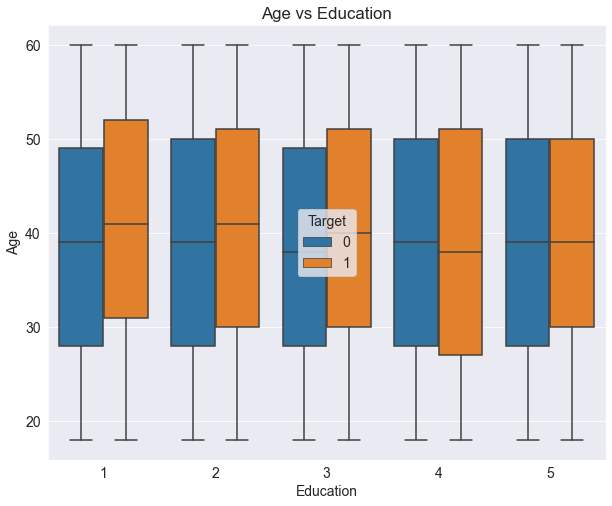

In [14]:
m.figure(figsize=(10,8))
m.title('Age vs Education')

s.boxplot(x = train_raw.Education, y = train_raw.Age, hue=train_raw.Target)
#used for graphically depicting groups of numerical data through their quartiles

<AxesSubplot:title={'center':'Job Satisfaction vs Education Field'}, xlabel='EducationField', ylabel='JobSatisfaction'>

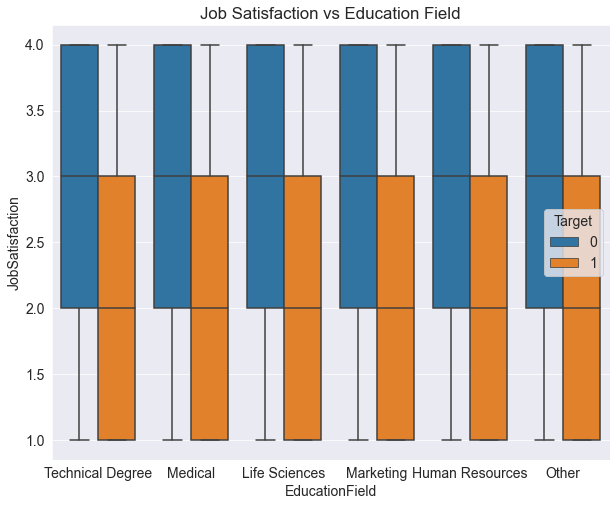

In [15]:
m.figure(figsize=(10,8))
m.title('Job Satisfaction vs Education Field')
s.boxplot(x = train_raw.EducationField, y = train_raw.JobSatisfaction, hue=train_raw.Target)

<AxesSubplot:title={'center':'Average Daily Hours vs Has Flexible Timings'}, xlabel='HasFlexibleTimings', ylabel='AvgDailyHours'>

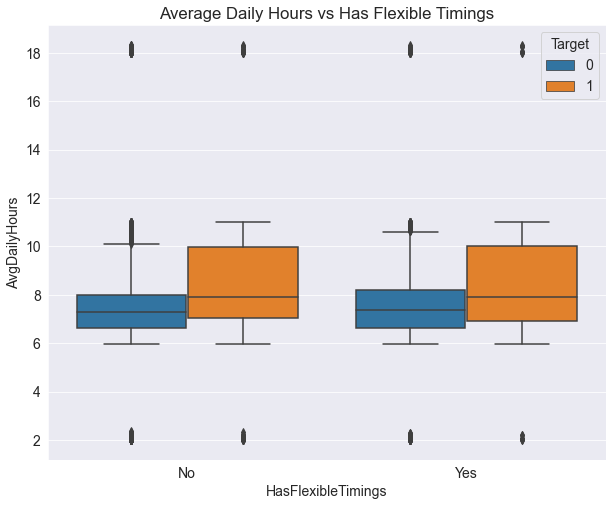

In [16]:
m.figure(figsize=(10,8))
m.title('Average Daily Hours vs Has Flexible Timings')
s.boxplot(x = train_raw.HasFlexibleTimings, y = train_raw.AvgDailyHours, hue=train_raw.Target)

<b>The above plot shows a significant aspect of how timings affect the levels of stress amongst employees.</b>

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Count'>

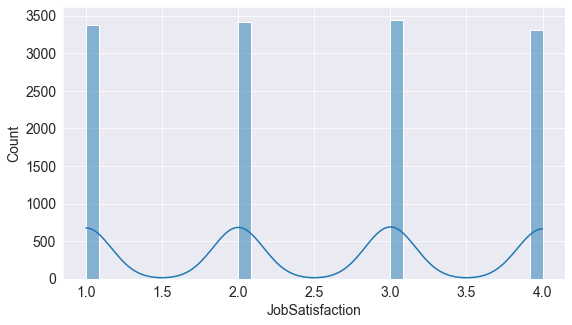

In [17]:
x = df['JobSatisfaction']
s.histplot(x, kde = True)
#The histplot() returns a matplotlib axes with a plot.
#KDE plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram 
#which represents the data using a continuous probability density curve in one or more dimensions.

<AxesSubplot:xlabel='Education', ylabel='Count'>

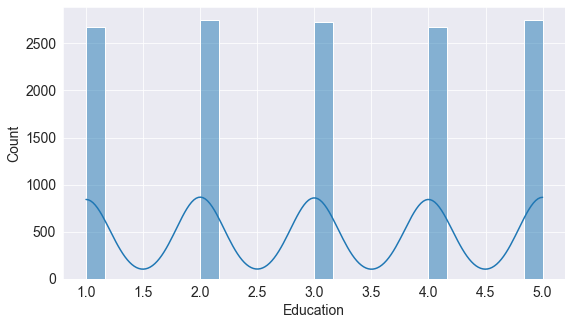

In [18]:
x = df['Education']
s.histplot(x, kde = True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

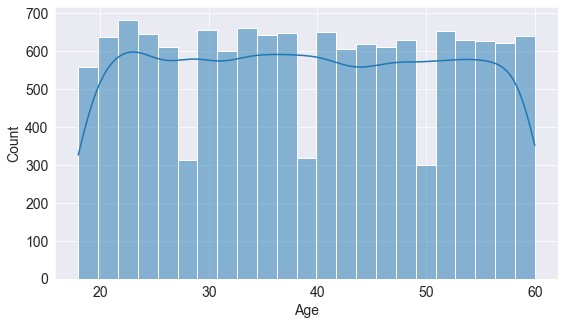

In [19]:
x = df['Age']
s.histplot(x, kde = True)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Count'>

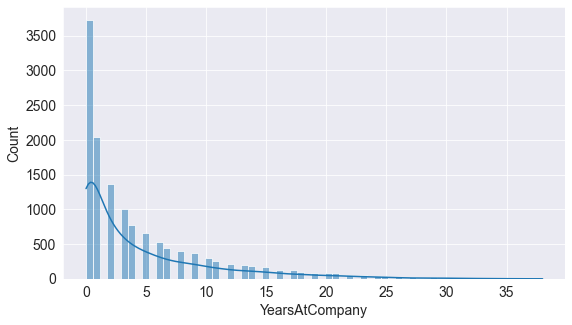

In [20]:
x = df['YearsAtCompany']
s.histplot(x, kde = True)

<AxesSubplot:title={'center':'Job Involvement vs IsIndividualContributor'}, xlabel='IsIndividualContributor', ylabel='JobInvolvement'>

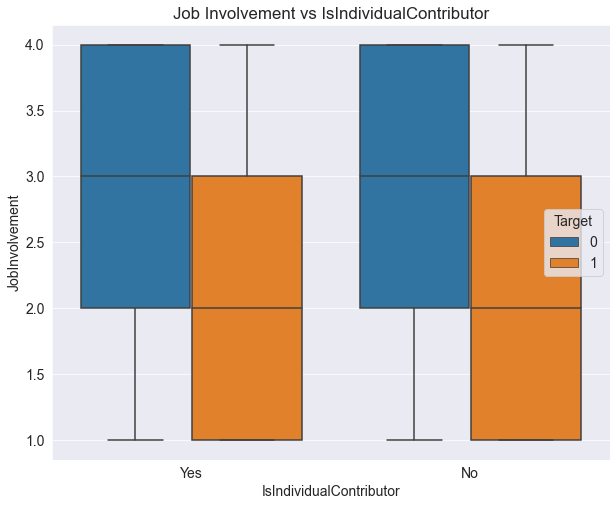

In [21]:
m.figure(figsize=(10,8))
m.title('Job Involvement vs IsIndividualContributor')
s.boxplot(x = train_raw.IsIndividualContributor, y = train_raw.JobInvolvement, hue=train_raw.Target)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Count'>

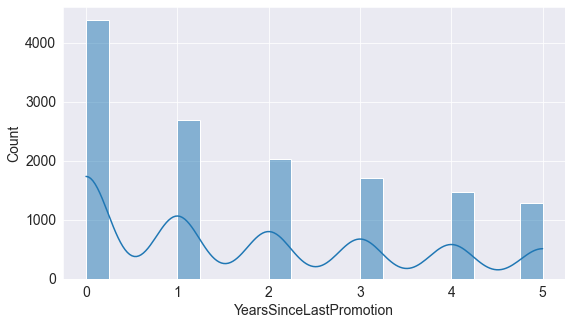

In [22]:
x = df['YearsSinceLastPromotion']
s.histplot(x, kde = True)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Count'>

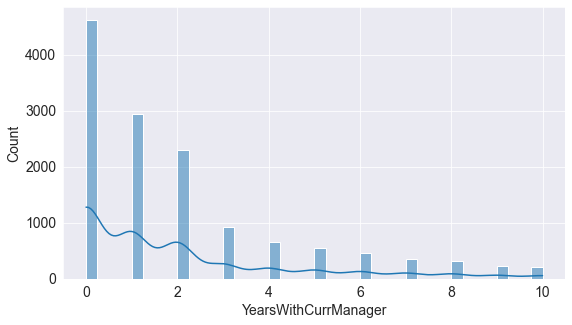

In [23]:
x = df['YearsWithCurrManager']
s.histplot(x, kde = True)

## Defining Utility Functions

In [24]:
def Data_Processor(temp_frame):
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    temp = p.DataFrame()
    temp_frame['HasFlexibleTimings']= label_encoder.fit_transform(temp_frame['HasFlexibleTimings']) 
    temp_frame['IsIndividualContributor']= label_encoder.fit_transform(temp_frame['IsIndividualContributor']) 
    temp_frame['RemoteWorkSatistfaction']= label_encoder.fit_transform(temp_frame['RemoteWorkSatistfaction']) 
    temp_frame['WorkLoadLevel']= label_encoder.fit_transform(temp_frame['WorkLoadLevel']) 
    temp = p.concat([p.get_dummies(temp_frame[col]) for col in ['Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus']], axis=1)
    temp.groupby(level=0, axis=1).sum()
    
    #p.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.
    
    temp_frame = p.concat([temp_frame, temp], axis=1)
    temp_frame.drop(['Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'EmployeeID'], axis=1, inplace=True) #Remove unimportant attribites

    return temp_frame;

In [25]:
def Normalize(df):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()  #to normalize the target features
    frame = p.DataFrame();
    frame = df
    frame.loc[:, ['Age', 'AvgDailyHours','LeavesTaken', 'MonthlyIncome', 
           'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']] = scaler.fit_transform(frame.loc[:, ['Age', 'AvgDailyHours','LeavesTaken', 'MonthlyIncome', 
           'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']]);
    return frame;

In [26]:
df = Data_Processor(df)

In [27]:
df

,Target,Age,AvgDailyHours,Education,HasFlexibleTimings,IsIndividualContributor,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,0,36.0,6.45,5,0,1,1,2,7.0,3.0,...,0,0,1,0,0,0,0,1,0,0
1,0,24.0,8.48,5,0,1,1,4,9.0,4.0,...,0,0,0,0,0,0,1,0,1,0
2,0,45.0,6.93,2,0,1,3,4,24.0,4.0,...,0,0,1,0,0,0,0,0,1,0
4,0,30.0,7.30,3,0,1,2,4,9.0,5.0,...,0,0,0,0,0,0,0,0,0,1
5,0,31.0,10.78,2,1,1,4,4,11.0,3.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,0,24.0,7.32,2,0,0,4,4,18.0,1.0,...,0,0,1,0,0,0,0,0,1,0
15996,0,56.0,7.60,2,0,0,2,3,14.0,2.0,...,0,0,0,0,0,1,0,0,0,1
15997,0,26.0,6.52,1,0,1,4,4,7.0,2.0,...,0,0,0,0,1,0,0,0,0,1
15998,0,29.0,6.11,4,1,0,4,2,8.0,2.0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
norm_df = Normalize(df) #Normalising the data 

In [29]:
norm_df

,Target,Age,AvgDailyHours,Education,HasFlexibleTimings,IsIndividualContributor,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,0,-0.242771,-0.727341,5,0,1,1,2,-0.606832,3.0,...,0,0,1,0,0,0,0,1,0,0
1,0,-1.212807,0.390193,5,0,1,1,4,-0.297836,4.0,...,0,0,0,0,0,0,1,0,1,0
2,0,0.484755,-0.463096,2,0,1,3,4,2.019630,4.0,...,0,0,1,0,0,0,0,0,1,0
4,0,-0.727789,-0.259408,3,0,1,2,4,-0.297836,5.0,...,0,0,0,0,0,0,0,0,0,1
5,0,-0.646953,1.656365,2,1,1,4,4,0.011159,3.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,0,-1.212807,-0.248398,2,0,0,4,4,1.092644,1.0,...,0,0,1,0,0,0,0,0,1,0
15996,0,1.373954,-0.094255,2,0,0,2,3,0.474653,2.0,...,0,0,0,0,0,1,0,0,0,1
15997,0,-1.051134,-0.688805,1,0,1,4,4,-0.606832,2.0,...,0,0,0,0,1,0,0,0,0,1
15998,0,-0.808625,-0.914514,4,1,0,4,2,-0.452334,2.0,...,0,0,0,0,0,0,0,0,1,0


### Plotting a Heatmap to find <b>Correlations</b> visually amongst the <b>Dependent</b> and <b>Independent variables</b>

<AxesSubplot:>

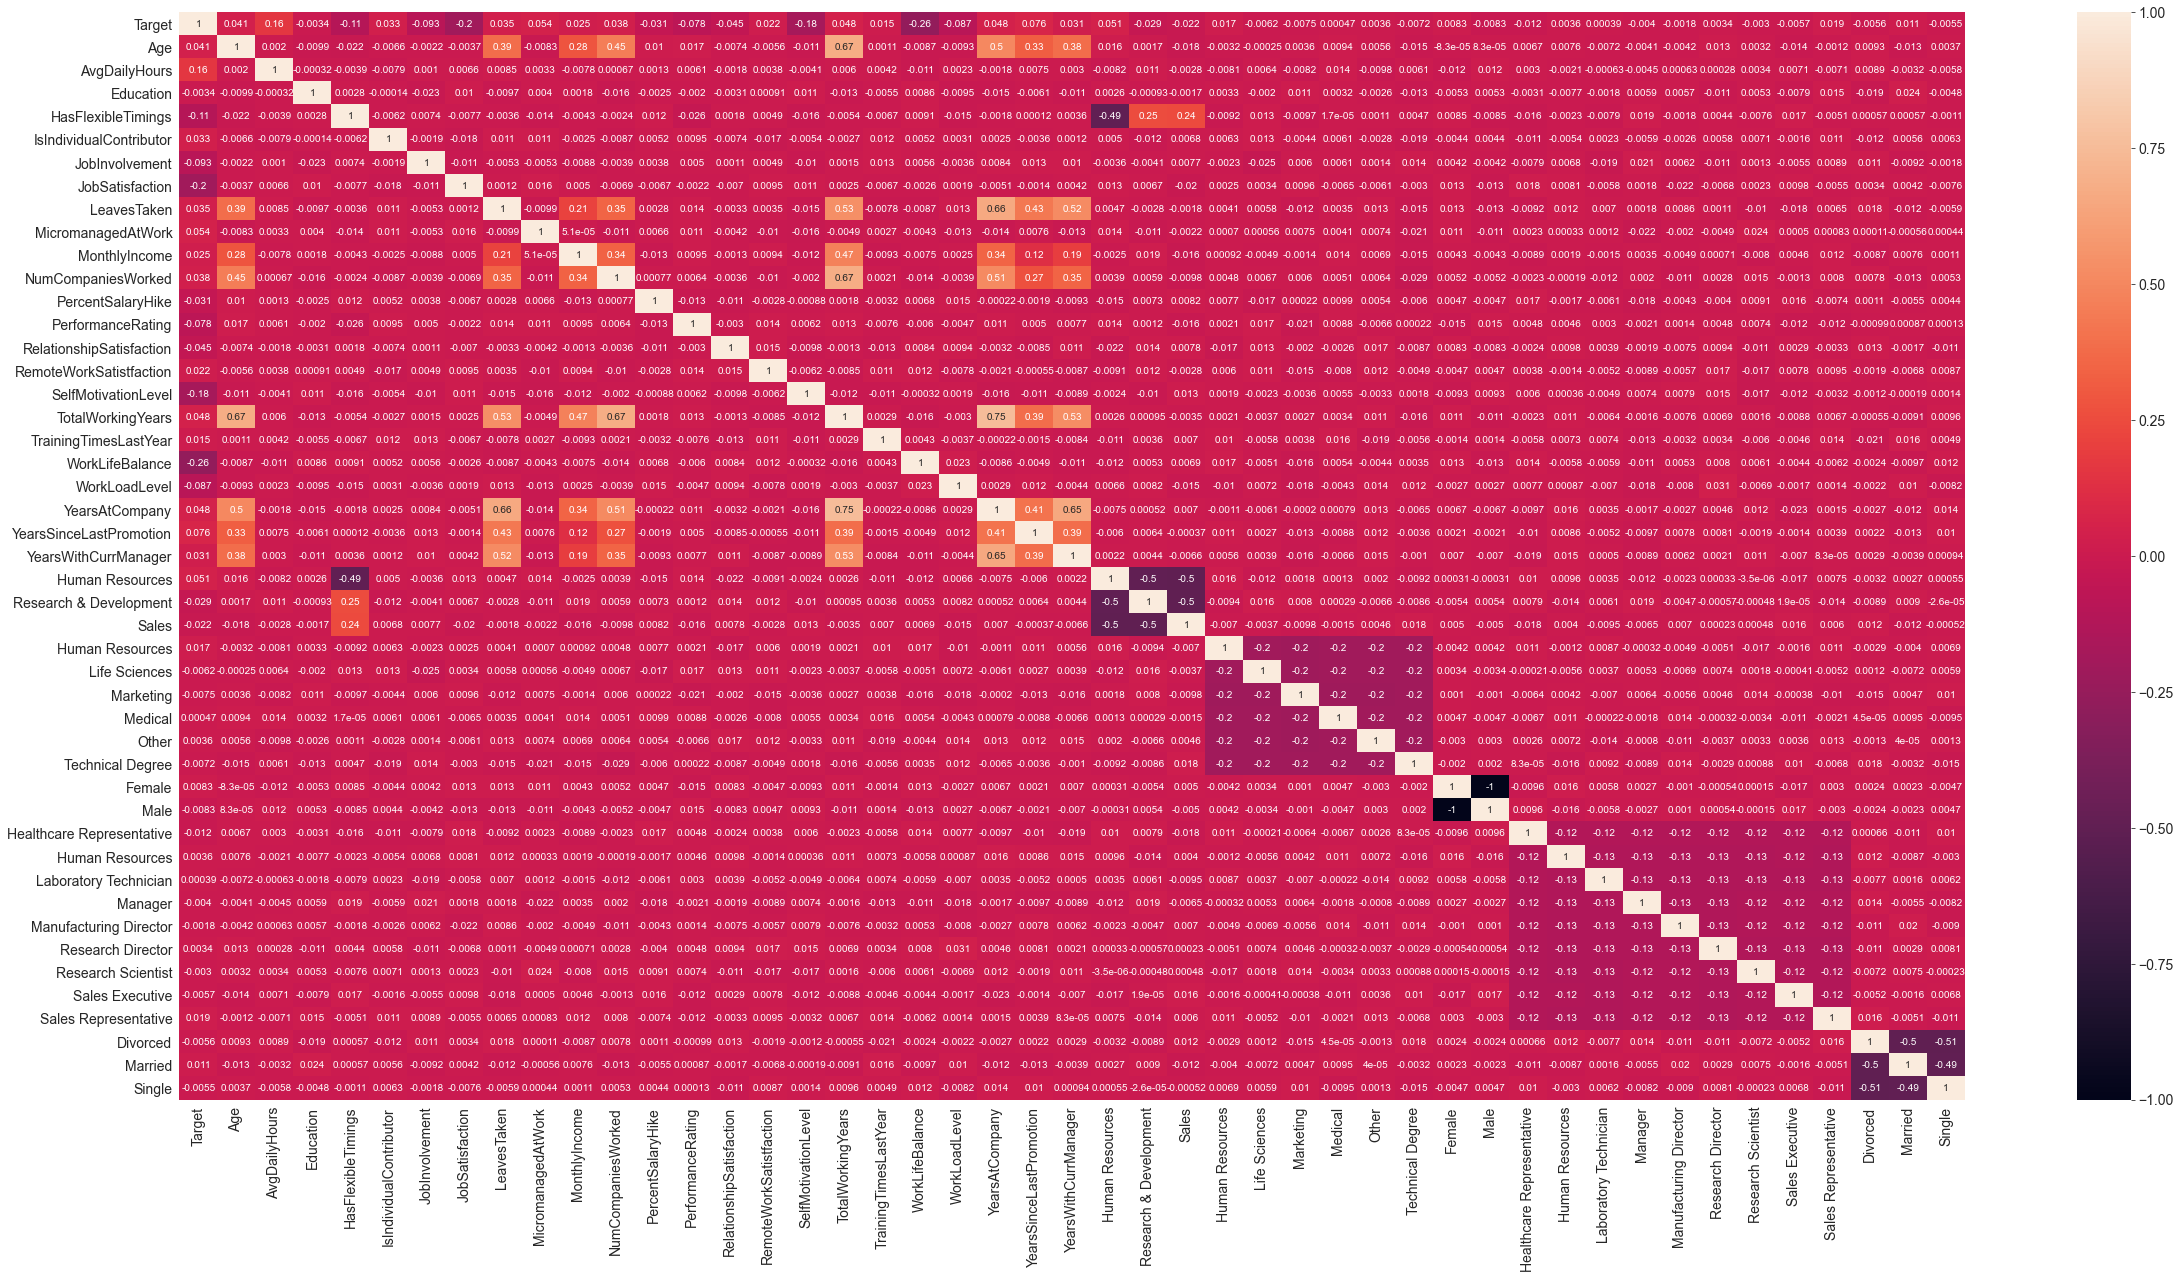

In [30]:
m.figure(figsize=(40,20))
s.heatmap(norm_df.corr(),annot=True, annot_kws={"fontsize":10}) #shows relationship between the different variables 

In [31]:
norm_df.columns 

Index(['Target', 'Age', 'AvgDailyHours', 'Education', 'HasFlexibleTimings',
       'IsIndividualContributor', 'JobInvolvement', 'JobSatisfaction',
       'LeavesTaken', 'MicromanagedAtWork', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'RemoteWorkSatistfaction',
       'SelfMotivationLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'WorkLoadLevel', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Human Resources',
       'Research & Development', 'Sales', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Other', 'Technical Degree', 'Female', 'Male',
       'Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Divorced', 'Married', 'Single'],
      dtype='object')

In [32]:
X = norm_df[['Age', 'AvgDailyHours', 'Education', 'HasFlexibleTimings',
       'IsIndividualContributor', 'JobInvolvement', 'JobSatisfaction',
       'LeavesTaken', 'MicromanagedAtWork', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'RemoteWorkSatistfaction',
       'SelfMotivationLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'WorkLoadLevel', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Human Resources',
       'Research & Development', 'Sales', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Other', 'Technical Degree', 'Female', 'Male',
       'Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Divorced', 'Married', 'Single']]

y = norm_df['Target']

We make training and test sets to make sure that after we train our classification algorithm, it is able to generalize well to new data.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=40) 
#Split arrays or matrices into random train and test subsets.

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (10843, 52) (10843,)
Test set: (2711, 52) (2711,)


We shall now begin training different <b>Classification Models</b> on the processed data.

Each model's hyperparameters will be tuned using <b>Grid Search</b> for optimized parameters and once the best fit is found, the model can be further optimized using Feature Selection.

### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression #Import the model you want to use
from sklearn.metrics import confusion_matrix
logistic = LogisticRegression(C=0.01, solver='liblinear') #Make an instance of the Model

logistic.fit(X_train,y_train) #Training the model on the data, storing the information learned from the data
#Model is learning the relationship between digits (x_train) and labels (y_train)
logistic

LogisticRegression(C=0.01, solver='liblinear')

In [70]:
yhatlr = logistic.predict(X_test) # Prediction on entire test data
#Uses the information the model learned during the model training process

yhatlr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
cf_matrix = confusion_matrix(y_test, yhatlr)
cf_matrix

array([[2168,   26],
       [ 392,  125]], dtype=int64)

In [53]:
log_loss(y_test, yhatlr) #how close the prediction probability comes to the corressponding true value

4.637454295710216

In [54]:
log_grid_param = {'C': [0.64, 0.66, 0.67, 0.68, 0.69, 0.7, 0.75],
                 'solver':['liblinear', 'sag', 'saga']}
#This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers. 


In [55]:
log_grid_srch = GridSearchCV(estimator=logistic, param_grid=log_grid_param, scoring='accuracy', 
                            n_jobs=-1)

#GridSearchCV implements a “fit” and a “score” method. 
#It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” 
#if they are implemented in the estimator used.

In [56]:
log_grid_srch.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(C=0.01, max_iter=20000,
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.64, 0.66, 0.67, 0.68, 0.69, 0.7, 0.75],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [57]:
logistic_best_parameters = log_grid_srch.best_params_ #Parameter setting that gave the best results on the hold out data.
print(logistic_best_parameters) 

{'C': 0.75, 'solver': 'sag'}


In [58]:
logistic_best_result = log_grid_srch.best_score_ #Mean cross-validated score of the best_estimator
print('Accuracy of Logistic Regression: ', logistic_best_result)

Accuracy of Logistic Regression:  0.8765096997443003


## Optimized Hyperparameters are: 
<br>
<ol>
    <li>C = 0.64</li>
    <li>solver = 'sag'</li>
</ol>
<br>
With an accuracy of <b>87.65101909065757 %</b>